In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.__version__

'1.5.3'

In [3]:
#reading file. real folder name is different for privacy purposes.
# data is from: https://www.kaggle.com/datasets/uciml/autompg-dataset
df=pd.read_csv('C:\\Users\\Sew-th\\Desktop\\Python Datasets\\auto-mpg.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


In [45]:
d=df.corr(numeric_only = True)
d

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,ptw
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.241495
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.221539
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.242275
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.552814
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.111594
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.757298
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.307826
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,-0.039636
ptw,0.241495,-0.221539,-0.242275,-0.552814,-0.111594,0.757298,0.307826,-0.039636,1.000000


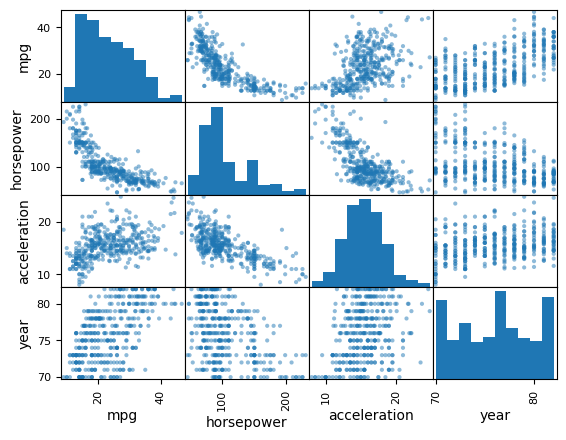

In [75]:
#make dataframe copies, create df4 for scatter matrix
df2=df.copy()
df2.rename(columns={'origin':'unknown'}, inplace= True)
df3=df.drop(['name','origin'], axis=1)
df4=df[['mpg','horsepower','acceleration','year']].copy()
pd.plotting.scatter_matrix(df4);

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

array([<Axes: title={'center': 'horsepower'}, xlabel='[year]'>,
       <Axes: title={'center': 'mpg'}, xlabel='[year]'>], dtype=object)

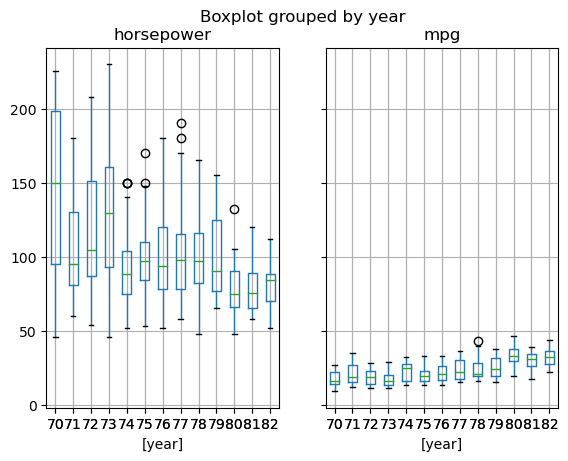

In [10]:
df[['mpg', 'horsepower','year']].boxplot(by='year')

array([<Axes: title={'center': 'mpg'}, xlabel='year'>,
       <Axes: title={'center': 'horsepower'}, xlabel='year'>],
      dtype=object)

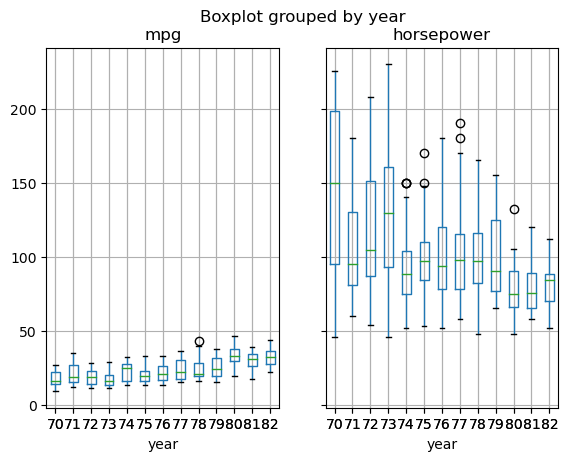

In [11]:
df.boxplot(column=['mpg', 'horsepower'], by='year')
#using column argument yields the same boxplot as when manipulating the dataframe.

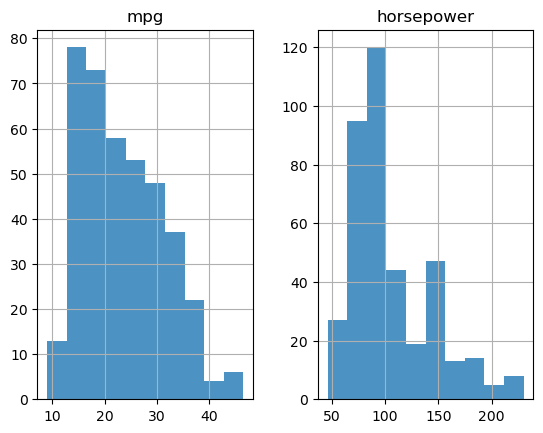

In [70]:
df.hist( column=['mpg','horsepower'], stacked=True, alpha=0.8,bins=10 );

In [15]:
df.shape
#rows and columns

(392, 9)

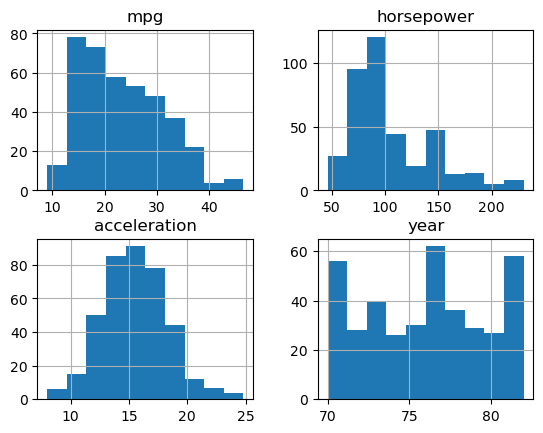

In [54]:
df4.hist();

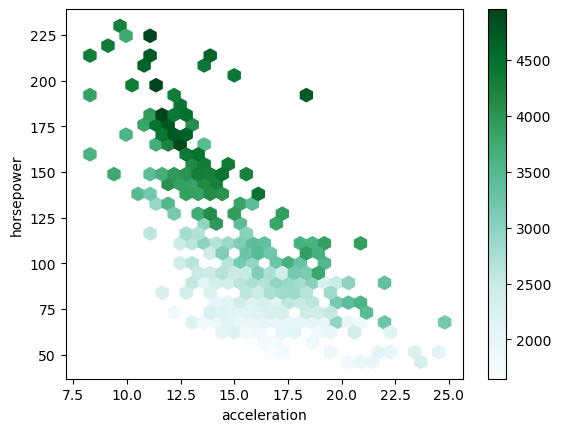

In [61]:
df.plot.hexbin(x='acceleration', y='horsepower', C='weight', reduce_C_function=np.mean, gridsize=30);

<Axes: xlabel='acceleration', ylabel='weight'>

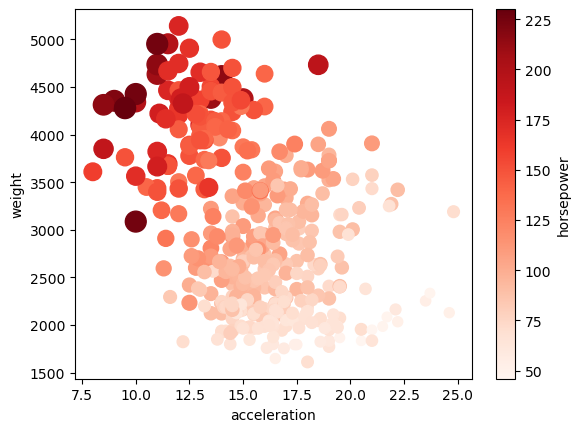

In [65]:
df.plot.scatter(x='acceleration', y='weight', c='horsepower', s='horsepower', cmap='Reds')

<Axes: ylabel='Density'>

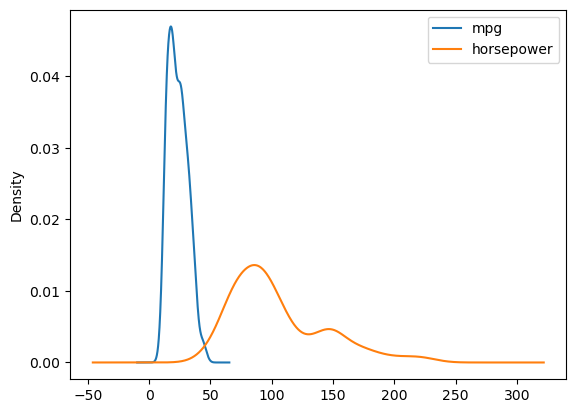

In [33]:
df[['mpg', 'horsepower']].plot.kde()

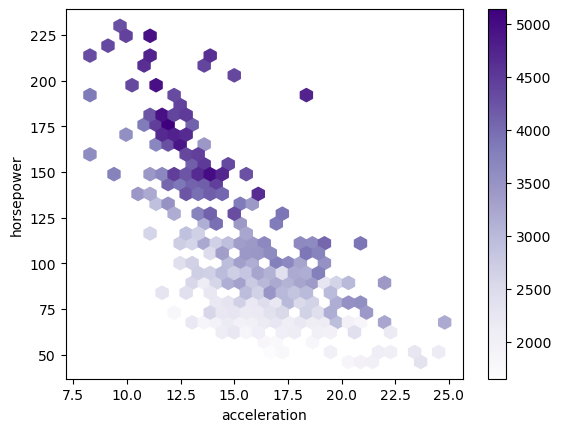

In [34]:
#using functions to draw graphs quicker
def plotf(a,b,c):
    df.plot.hexbin(x=a, y=b, C=c, reduce_C_function=np.max, gridsize=30, cmap=plt.cm.Purples)
    
plotf('acceleration','horsepower','weight')

In [37]:
#new column
df['ptw']= df['weight']/df['horsepower']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,ptw
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,26.953846
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,22.381818
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,22.906667
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,22.886667
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,24.635714
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,32.441860
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,40.961538
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,27.321429
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,33.227848


<Axes: xlabel='ptw', ylabel='mpg'>

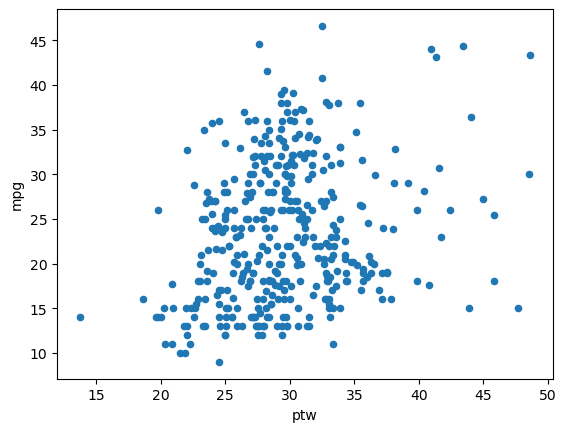

In [67]:
#power to weight ratio vs fuel effiency
df.plot.scatter(x='ptw', y='mpg')

<Axes: ylabel='Frequency'>

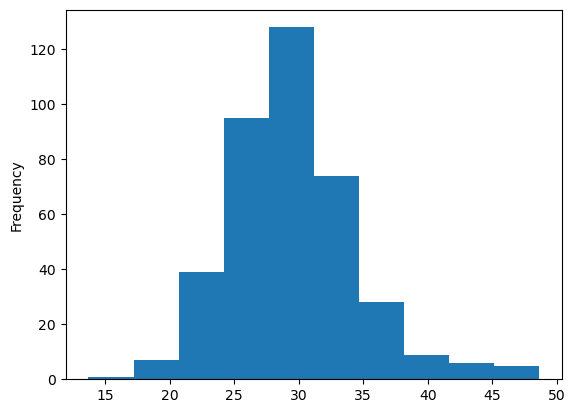

In [40]:
df['ptw'].plot.hist()